In [4]:
from tess_sip import SIP

In [5]:
import lightkurve as lk

In [6]:
# Download target pixel files
tpfs = lk.search_targetpixelfile('TIC 288735205', mission='tess').download_all()

In [7]:
# Run SIP
r = SIP(tpfs)

/Users/ch/K2/requests/ruth/tess-long-period-tools/TESS-SIP/src/tess_sip/tess_sip.py:101: RuntimeWarning: invalid value encountered in sqrt
  werr = ((np.linalg.inv(sigma_w_inv))**0.5).diagonal()


/Users/ch/K2/requests/ruth/tess-long-period-tools/TESS-SIP/src/tess_sip/tess_sip.py:101: RuntimeWarning: invalid value encountered in sqrt
  werr = ((np.linalg.inv(sigma_w_inv))**0.5).diagonal()


[(0.9, 1.1)]

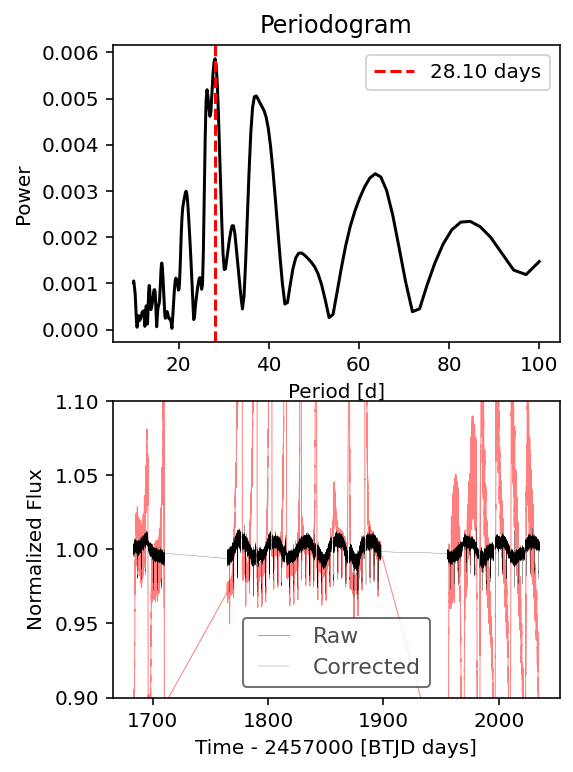

In [8]:
import matplotlib.pyplot as plt
# Example plotting
fig, axs = plt.subplots(2, figsize=(4, 6))
axs[0].plot(r['periods'], r['power'], c='k')
axs[0].set(xlabel='Period [d]', ylabel='Power', title='Periodogram')
axs[0].axvline(r['period_at_max_power'], color='r', ls='--', label=f"{r['period_at_max_power']:0.2f} days")
axs[0].legend()
r['raw_lc'].plot(ax=axs[1], c='r', label='Raw', alpha=0.5)
r['corr_lc'].plot(ax=axs[1], c='k', label='Corrected', lw=0.1)
axs[1].set(ylim=(0.9, 1.1))
#plt.savefig('demo.png', dpi=200, bbox_inches='tight')